In [1]:
import pandas as pd
meta=pd.read_table("meta.txt",header=None,index_col=0)

In [2]:
import scanpy as sc
adata_bulk=sc.read("adata_bulk_star.h5ad")

In [3]:
import numpy as np
adata_bulk=adata_bulk[np.argsort(adata_bulk.obs_names)]

In [4]:
adata_bulk.obs["condition"]=[c.split(" ")[0] for c in meta[1].values]

Trying to set attribute `.obs` of view, copying.


In [5]:
cnts=pd.read_csv("GSE152774_HTSeq_genes_count_df.csv",index_col=0)

In [6]:
adata_bulk.obs["filter"]="out"
adata_bulk.obs.iloc[cnts.columns.astype(int)-1,1]="in"

In [7]:
adata_bulk=adata_bulk[cnts.columns.astype(int)-1]

In [8]:
adata_bulk=adata_bulk[adata_bulk.obs.condition!="NG2DsRed+"]

In [9]:
import deseq2py as deseq2

In [10]:
sc.pp.filter_genes(adata_bulk,min_cells=3)

Trying to set attribute `.var` of view, copying.


In [11]:
deseq2.tl.run(adata_bulk,formula=" ~ condition")

Running DESeq2
    done (0:00:21) --> added
    .layers['normalized'] normalized count matrix.
    .uns['dds'] DESeq2 R object.
    .uns['Formula'] formula used for design parameter.


In [12]:
deseq2.tl.vst(adata_bulk)

Obtaining vsd
    done (0:00:00) --> added
    .layers['vsd'] variance stabilized count matrix.


In [13]:
deseq2.tl.pca(adata_bulk)

Obtaining PCA
    on highly variable genes using vsd matrix
    done (0:00:00) --> added
    .var['vsd_std'] variance of genes calculated from vsd matrix.
    .var['highly_variable'] genes considered as highly variable.
    .obsm['X_pca'] PCA results.
    .uns['pca'] PCA additional results.


In [15]:
deseq2.tl.show_results(adata_bulk)

[1] "Intercept"                               
[2] "condition_S100GFP._vs_NG2DsRed..S100GFP."



In [16]:
deseq2.tl.result(adata_bulk,lfc_shrink=True,name="condition_S100GFP._vs_NG2DsRed..S100GFP.")

Generating DE results
    running LFC shrinking
    done (0:00:13) --> added
    .uns['condition_S100GFP._vs_NG2DsRed..S100GFP.']['LFC_shrink'] table of differential expression results.


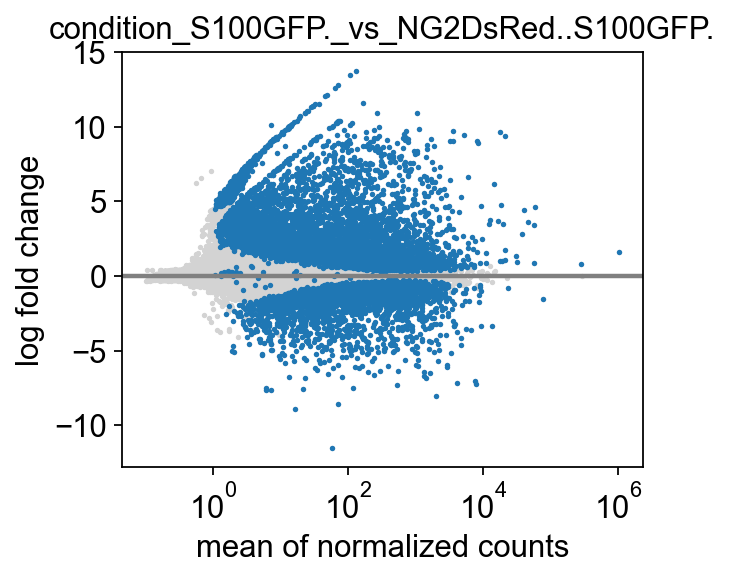

In [17]:
deseq2.pl.result(adata_bulk,"LFC_shrink","condition_S100GFP._vs_NG2DsRed..S100GFP.")

In [18]:
deseq2.tl.save(adata_bulk,"adata_bulk_deseq2")

Saving results
    done --> saved
    adata_bulk_deseq2.h5ad: anndata file containing counts matrices, pca and DE results.
    adata_bulk_deseq2.rds: R object of the DESeqDataSet.
